#   Η Μετανάστρια Μάνα

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Για να καταλάβουμε ακόμα καλύτερα τη μέθοδο PCA, θα την χρησιμοποιήσουμε σε μία εικόνα.

* Η εικόνα είναι η διάσημη [φωτογραφία της μετανάστριας μάνας, από τη φωτογράφο Dorothea Lange](https://en.wikipedia.org/wiki/Florence_Owens_Thompson).

* Η εικόνα δεν περιέχεται μέσα στο scikit-learn (ή κάποια άλλη από τις βιβλιοθήκες που χρησιμοποιούμε), άρα θα πρέπει να την διαβάσουμε εμείς.

* Για να την χειριστούμε, θα χρησιμοποιήσουμε τη βιβλιοθήκη Python Imaging Library (PIL), ή μάλλον για την ακρίβεια τη βιβλιοθήκη [Pillow](https://pillow.readthedocs.io/en/stable/).

* Θα φτιάξουμε μια βοηθητική συνάρτηση για να μπορούμε να εμφανίζουμε φωτογραφίες μέσα στο σημειωματάριό μας.

In [1]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open("lange_migrant_mother.jpg")

def show_image(img, h, w, size):
    plt.figure(figsize=(12, 10))
    plt.xticks(())
    plt.yticks(())
    plt.imshow(img,  cmap=plt.cm.gray)
    plt.title("height: %s width: %s size: %s" % (h, w, size))

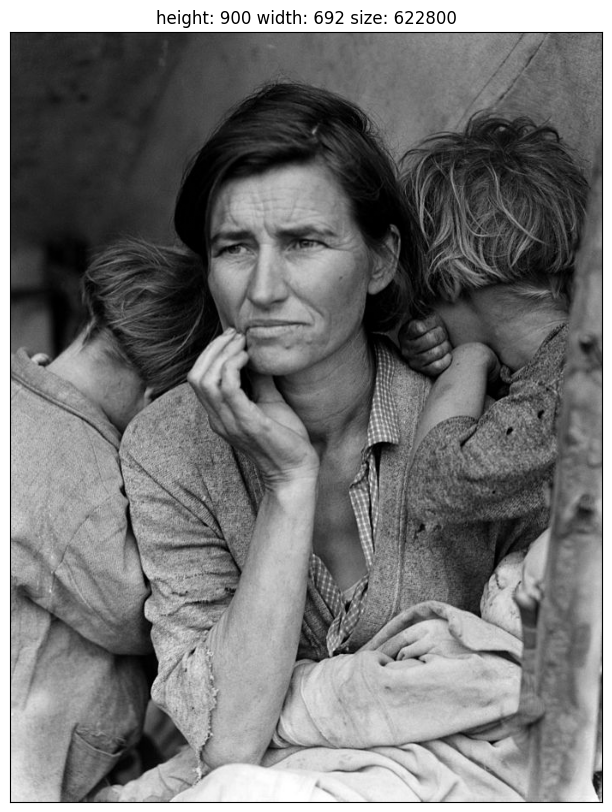

In [2]:
show_image(img, img.size[1], img.size[0], img.size[0] * img.size[1])

* Τώρα θα μετατρέψουμε τη φωτογραφία στη μορφή που καταλαβαίνει το scikit-learn.

* To scikit-learn περιμένει τα δεδομένα σε έναν πίνακα με τόσες γραμμές όσες οι παρατηρήσεις και τόσες στήλες όσα τα χαρακτηριστικά.

* Αυτό θα κάνουμε κι εμείς. 

* Θα φτιάξουμε τον πίνακα των δεδομένων μας. Κάθε δείγμα θα είναι μια γραμμή της φωτογραφίας και κάθε pixel κάθε γραμμής της φωτογραφίας θα μπαίνει στην αντίστοιχη στήλη.

* Όπως διαβάσαμε τη φωτογραφία, οι γραμμές και οι στήλες είναι ανάποδα, άρα πρέπει να τις αντιστρέψουμε.

In [3]:
import numpy as np
print('Before reshaping:', img.size)
image_array = np.array(img.getdata(), np.uint8).reshape((img.size[1], img.size[0]))
print('After reshaping:', image_array.shape)

Before reshaping: (692, 900)
After reshaping: (900, 692)


* Αυτή τη στιγμή τα δεδομένα μας απαρτίζονται από 900 γραμμές και 692 στήλες.

* Θα χρησιμοποιήσουμε τη μέθοδο PCA με 50 συνιστώσες.

* Στην πράξη αυτό σημαίνει ότι αντί για την αρχική εικόνα των 692 στηλών-διαστάσεων, θα έχουμε πλέον 50 στήλες-διαστάσεις.

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(image_array)

,n_components,50
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


* Τι πετύχαμε;

* Βρήκαμε τις 50 κύριες συνιστώσες της φωτογραφίας μας.

* Κάθε συνιστώσα είναι μια νέα διάσταση, ή στήλη.

* Κάθε στήλη μας δίνει ένα γραμμικό συνδυασμό των αρχικών 692 στηλών. Τα παριεχόμενα κάθε στήλης είναι τα φορτία με τα οποιά πολλαπλασιάζονται οι αρχικές στήλες για να προβάλουμε τα δεδομένα στις νέες μας διαστάσεις.

In [5]:
pca.components_.shape

(50, 692)

* Για να δούμε την ιδιότητα `explained_variance_ratio_`:

In [6]:
pca.explained_variance_ratio_

array([0.47304963, 0.1281772 , 0.09398614, 0.05163205, 0.03208675,
       0.02249176, 0.01838176, 0.01489537, 0.01297648, 0.01056557,
       0.00931143, 0.00778975, 0.00703793, 0.00594134, 0.00562516,
       0.00547761, 0.00486829, 0.00431924, 0.00401961, 0.00366617,
       0.00330617, 0.00303809, 0.00289611, 0.00251274, 0.00239563,
       0.00222432, 0.00201078, 0.00197097, 0.00185998, 0.00182421,
       0.00169807, 0.0016067 , 0.00152937, 0.00150396, 0.00145237,
       0.00135394, 0.00120389, 0.00118387, 0.00117507, 0.0011261 ,
       0.00111494, 0.00108891, 0.00103314, 0.00097147, 0.00091383,
       0.0009098 , 0.00087759, 0.00086687, 0.00082648, 0.0008044 ])

* Μπορούμε να απεικονίσουμε γραφικά, με το λεγόμενο *διάγραμμα κορημάτων* (scree plot), το ποσοστό της διακύμανσης που εξηγείται από κάθε συνιστώσα και το αθροιστικό ποσοστό.

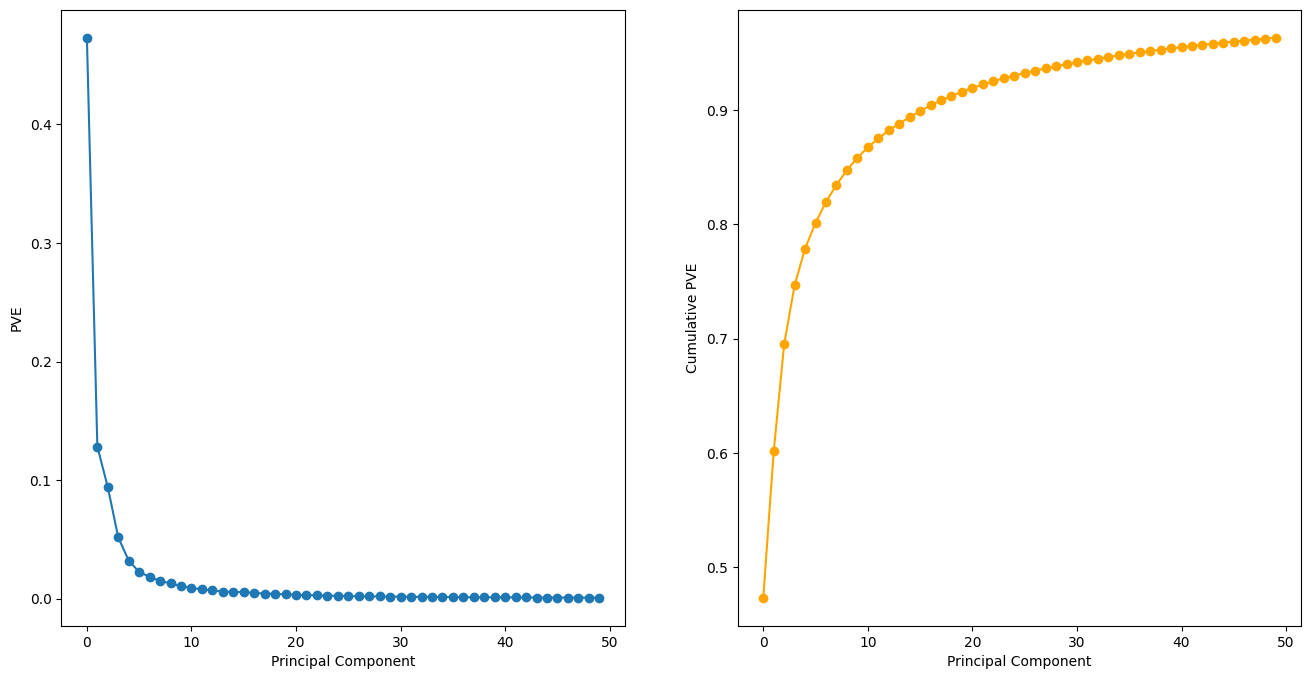

In [7]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

* Μιας και οι συνιστώσες μας είναι στην πραγματικότητα στήλες, θα μπορούσαμε μάλιστα να τις ζωγραφίσουμε.

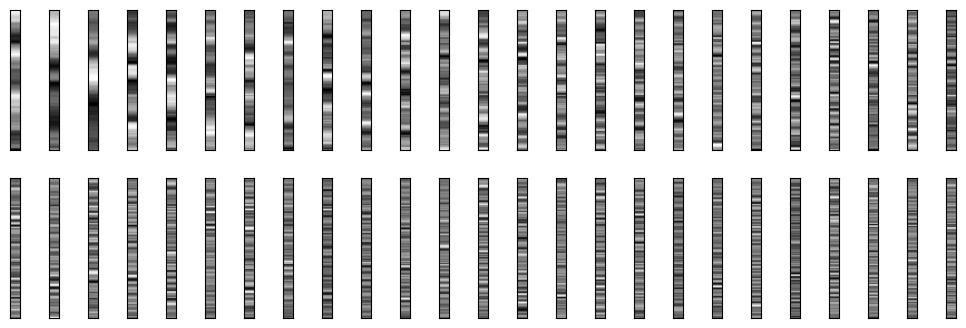

In [8]:
col_width = 50
plt.figure(figsize=(0.5 * 25, 2 * 2))
for component in range(pca.components_.shape[0]):
    plt.subplot(pca.components_.shape[0] // 25, 25, component + 1)
    comp_col = np.tile(pca.components_[component], col_width).reshape((col_width, -1)).T
    plt.imshow(comp_col, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

* Μπορούμε τώρα να προβάλουμε την αρχική μας φωτογραφία σε αυτές τις πενήντα διαστάσεις.

* Έτσι ο αριθμός των διαστάσεων των δεδομένων μας θα μειωθεί, από τις 900 γραμμές και 692 στήλες, σε 900 γραμμές και 50 στήλες.

In [9]:
image_pca = pca.transform(image_array)
print(image_pca.shape)

(900, 50)


* Μπορούμε όμως να κάνουμε και τον αντίστροφο μετασχηματισμό, με χρήση της μεθόδου `inverse_transform()`.

* Έτσι θα επιστρέψουμε στις αρχικές μας διαστάσεις, από τα δεδομένα που έχουμε προβάλει στις μειωμένες.

* Βεβαίως, τα δεδομένα στα οποία έχουμε εφαρμόσει την PCA έχουν μικρότερο μέγεθος από τα αρχικά.

In [10]:
reduced_image = pca.inverse_transform(image_pca)

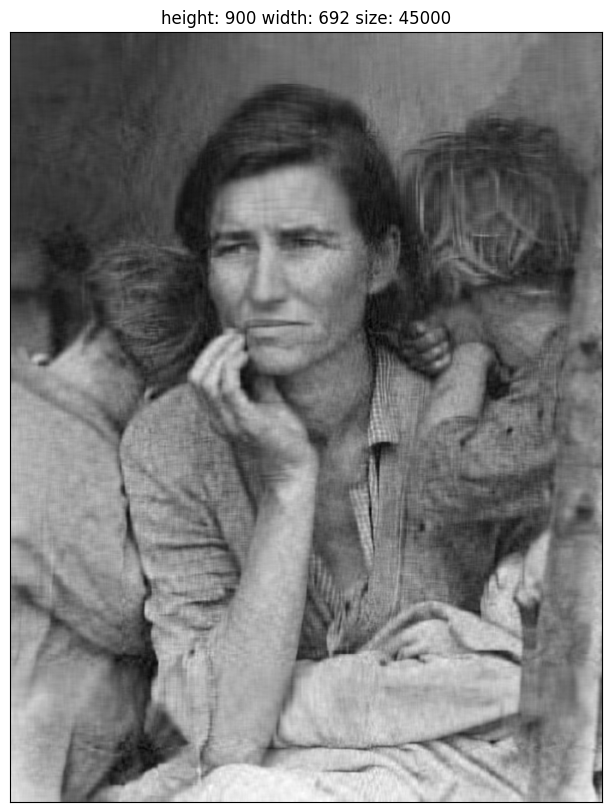

In [11]:
show_image(reduced_image, reduced_image.shape[0], reduced_image.shape[1], image_pca.size)

* Η διαφορά που κάνουν οι διαδοχικές συνιστώσες στην αναπαράσταση των δεδομένων μας φαίνεται αν κάνουμε την αντίστροφη προβολή για διαφορετικούς αριθμούς συνιστωσών.

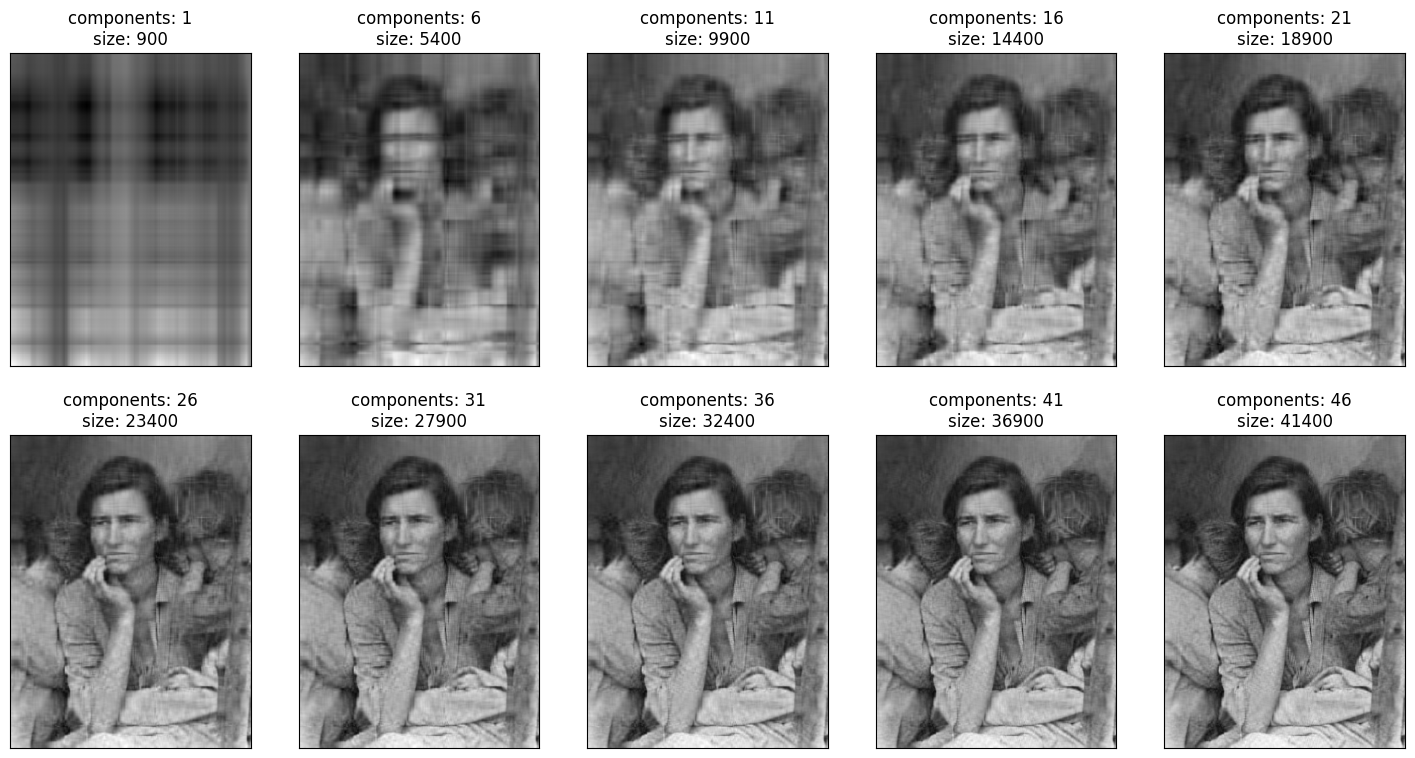

In [12]:
plt.figure(figsize=(2 * 1.8 * 5, 2 * 2.4 * 5))
for n_components in range(1, 51, 5):
    pca = PCA(n_components=n_components).fit(image_array)
    image_pca = pca.transform(image_array)
    plt.subplot(5, 5, 1 + n_components // 5)
    plt.imshow(pca.inverse_transform(image_pca), cmap=plt.cm.gray)
    title = 'components: %s\nsize: %s' % (n_components, image_pca.size)
    plt.title(title, size=12)
    plt.xticks(())
    plt.yticks(())

* Γενικότερα, δεν ξέρουμε ποιος είναι ο βέλτιστος αριθμός συνιστωσών.

* Τα διαγράμματα που ζωγραφίσαμε με τα ποσοστά διακύμανσης που εξηγούν μπορούν να μας βοηθήσουν.

* Περισσότερες συνιστώσες = περισσότερη λεπτομέρεια, αλλά και περισσότερες διαστάσεις (που ακριβώς θέλαμε να τις μειώσουμε).